# Logistic Regression


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../data/forest_data.csv")
df.head()

,Area,Oxygen,Temperature,Humidity,Fire Occurrence
0,Kotagiri,5,19,52,1
1,Ladakh,8,26,59,1
2,Andaman,6,22,63,0
3,Jim,9,26,59,1
4,Silent,8,27,65,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Area             5000 non-null   object
 1   Oxygen           5000 non-null   int64 
 2   Temperature      5000 non-null   int64 
 3   Humidity         5000 non-null   int64 
 4   Fire Occurrence  5000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 195.4+ KB


In [4]:
from sklearn.model_selection import train_test_split


def data_split(df, target, test_size):
    X, Y = df.drop(["Area", target], axis=1), df[target]
    x_train, x_test, y_train, y_test = train_test_split(
        X, Y, random_state=0, test_size=test_size
    )
    train = pd.concat([x_train, y_train], axis=1)
    test = pd.concat([x_test, y_test], axis=1)
    print(x_train.shape, x_test.shape)
    return x_train, x_test, y_train, y_test

In [5]:
x_train, x_test, y_train, y_test = data_split(df, "Fire Occurrence", 0.2)

(4000, 3) (1000, 3)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()
n_iter = 15
grid_values = {"penalty": ["l1", "l2"], "C": [0.01, 0.1, 1, 10, 100]}

In [7]:
best_model = GridSearchCV(model, param_grid=grid_values, cv=3, scoring="recall")
hyperparameter_tuning = best_model.fit(x_train, y_train)

/home/eyepatch/anaconda3/envs/mlops/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/eyepatch/anaconda3/envs/mlops/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/eyepatch/anaconda3/envs/mlops/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/eyepatch/anaconda3/envs/mlops/lib/python3.9/site-packages/sklea

In [8]:
best_model.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [9]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
)

train_pred = best_model.predict(x_train)
print("\t\tTRAIN:\n")
print(f"Accuracy: {accuracy_score(y_train, train_pred)}\n")
print(f"Classification report: \n {classification_report(y_train, train_pred)}")
train_cm = confusion_matrix(y_train, train_pred)
print(f"Confusion matrix: \n {confusion_matrix(y_train, train_pred)}")

		TRAIN:

Accuracy: 0.82975

Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      2089
           1       0.82      0.83      0.82      1911

    accuracy                           0.83      4000
   macro avg       0.83      0.83      0.83      4000
weighted avg       0.83      0.83      0.83      4000

Confusion matrix: 
 [[1731  358]
 [ 323 1588]]


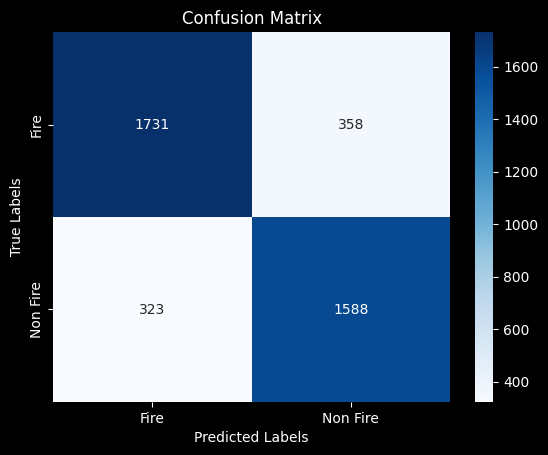

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(train_cm, annot=True, cmap="Blues", fmt="d")

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

class_labels = ["Fire", "Non Fire"]
ticks = np.arange(len(class_labels)) + 0.5
plt.xticks(ticks, class_labels)
plt.yticks(ticks, class_labels)
plt.show()

In [11]:
test_pred = best_model.predict(x_test)
print("\t\tTEST:\n")
print(f"Accuracy: {accuracy_score(y_test, test_pred)}\n")
print(f"Classification report: \n {classification_report(y_test, test_pred)}")
test_cm = confusion_matrix(y_test, test_pred)
print(f"Confusion matrix: \n {test_cm}")

		TEST:

Accuracy: 0.833

Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       509
           1       0.82      0.84      0.83       491

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000

Confusion matrix: 
 [[419  90]
 [ 77 414]]


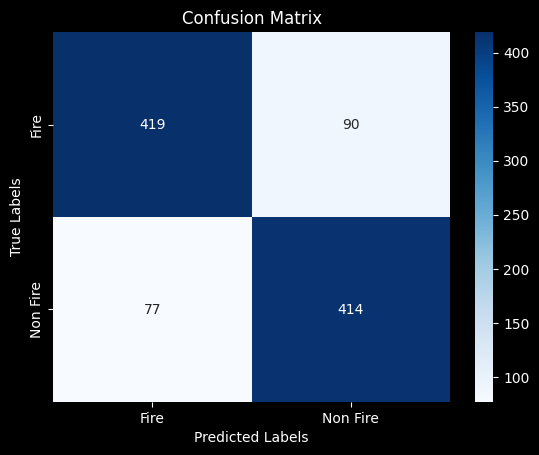

In [12]:
sns.heatmap(test_cm, annot=True, cmap="Blues", fmt="d")

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

class_labels = ["Fire", "Non Fire"]
ticks = np.arange(len(class_labels)) + 0.5
plt.xticks(ticks, class_labels)
plt.yticks(ticks, class_labels)
plt.show()

In [13]:
import pickle

file_name = "LogisticRegression.pkl"
with open(file_name, "wb") as f:
    pickle.dump(best_model.best_estimator_, f)